In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import random
from tqdm import tqdm_notebook as tqdm
 
def schaffer(x,y):                          # Defines the function
    num = (np.cos(np.sin(abs(x**2-y**2))))**2 - 0.5
    den = (1 + 0.001*(x**2+y**2))**2
    return 0.5 + num/den
def himmelblau(x,y):
    score = (x**2 + y - 11)**2 +( x**2 +y**2 - 7)**2
    return score
def matyas(x,y):
    score = 0.26*(x**2+y**2) - (0.48*x*y)
    return score
matyas_min = -10
matyas_max = 10
himmel_min = -5
himmel_max = 5
schaffer_min = -100
schaffer_max = 100


In [2]:
def randompoints(num):
    points = []
    scores = []
    for i in range(num):
        x = random.randrange(-100, 100)
        y = random.randrange(-100,100)
        point = himmelblau(x,y)
        scores.append( 1.0 / (point + 0.01) )
        points.append(x)
    
    return scores, points


    

In [3]:
#initializes population with random generation, chromosome length is 2, population of size num
def initialize(num, minimum, maximum):
    points = []
    ranging = maximum - minimum
    for i in range(num):
        chromosome = ( np.random.rand(2)) * ranging + minimum
        points.append(chromosome)
    return points

#determines fitness of population
def fitness(population, func):
    scores = []
    for i in population:
        score = score = func(i[0], i[1])
        scores.append( 1.0 / (score + 0.01) ) 
    scores, pop = np.array(scores), np.array(population.copy())
    inds = np.argsort(scores) 
    scores = list(scores[inds][::-1])
    pop = list(pop[inds,:][::-1])
    return scores, pop

#selects parents for crossover
def selection(scores, pop_after_fit):
    population_nextgen = []
    # pick our remaining parents (so two for each child)
    max_val = np.sum(scores)
    #print(max_val)
    for i in range(0,len(scores)):
        for k in range(2): 
            pick = random.uniform(0, max_val)
            current = 0
            for j in range(len(scores)): 
                current += scores[j]
                if current > pick: 
                    break 
#             print("j ", j)
            population_nextgen.append(pop_after_fit[j].copy()) 
#     print("hey", population_nextgen)
    return population_nextgen


In [4]:
#assumes length 2 of chromosomes
def single_crossover(pop_after_sel, sz):
    population_nextgen = []
    pick = np.random.randint(0, sz)
    pop_after_sel = np.array(pop_after_sel)
    one = np.array(pop_after_sel[:, 0])
    two = np.array(pop_after_sel[:, 1])
    newone = np.append(one[:pick], two[pick:])
    newtwo = np.append(two[:pick], one[pick:])
    pop_after_sel[:, 0] = newone
    pop_after_sel[:, 1] = newtwo
    population_nextgen = pop_after_sel.copy()
    return population_nextgen

#performs 3 point crossover
def three_crossover(pop_after_sel, sz):
    temp = pop_after_sel.copy()
    for i in range(0, 3):
        temp = single_crossover(temp, sz)
    return temp

#performs 5 point crossover
def five_crossover(pop_after_sel,sz):
    temp = pop_after_sel.copy()
    for i in range(0, 5):
        temp = single_crossover(temp, sz)
    return temp

In [5]:
def crossover(pop_after_sel,sz):
    pick = random.uniform(0, sz)
    first_point = 0
    second_point = 0
    population_nextgen = []
    
    for i in range(0,sz):
        # make our child (parent 1)
        child = pop_after_sel[2*i+0].copy()
        parent2 = pop_after_sel[2*i+1].copy()
        while(first_point == second_point):
            first_point = random.randint(0,len(pop_after_sel))
            second_point = random.randint(0,len(pop_after_sel))

        if( first_point > second_point ):
            swap = first_point
            first_point = second_point
            second_point = swap
            # swap 
        child[first_point:second_point] = parent2[first_point:second_point]
        population_nextgen.append(child) 
    return population_nextgen

def mutation(pop_after_cross, mutation_rate, n, minimum, maximum):
    population_nextgen = []
    ranging = maximum - minimum
    for i in range(0,n): 
        chromosome = pop_after_cross[i].copy()
        for j in range(len(chromosome)): 
            if random.random() < mutation_rate:
                new = ranging * np.random.rand() + minimum
                chromosome[j]=  new
                
        population_nextgen.append(chromosome.copy())
    return population_nextgen





In [6]:
def generations(sz,mutation_rate,n_gen, minimum, maximum):
    best_chromo = []
    best_score = []
    population_nextgen = initialize(sz, minimum, maximum)
    stats_min = np.zeros(n_gen)
    stats_avg = np.zeros(n_gen)
    stats_max = np.zeros(n_gen)
    stored_points = []
    for i in tqdm(range(n_gen)):
        # evaluate
        scores, pop_after_fit = fitness(population_nextgen, schaffer)
        # select
        pop_sel = selection(scores,pop_after_fit)
        pop_after_cross = five_crossover(pop_sel,sz)
        population_nextgen = mutation(pop_after_cross,mutation_rate,sz, minimum, maximum)
        scores, pop_after_fit = fitness(population_nextgen, schaffer)
        stored_points.append( pop_after_fit ) 
        best_chromo.append(pop_after_fit[0].copy())
        best_score.append(scores[0].copy())        
        stats_min[i] = np.min(scores)
        stats_max[i] = np.amax(scores)
        stats_avg[i] = np.mean(scores)        
    return best_chromo,best_score,stats_min,stats_avg,stats_max,stored_points

/var/folders/1t/smd8ymyd26g5wmnpp7bz9bww0000gn/T/ipykernel_36161/2902258324.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(n_gen)):


  0%|          | 0/200 [00:00<?, ?it/s]

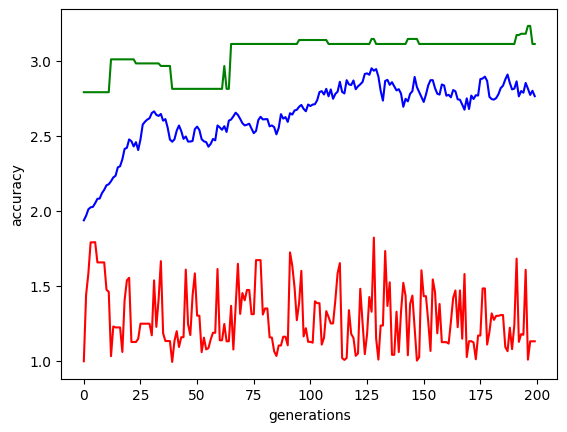

In [7]:
s = 150 # number of individuals
ngen = 200 # number of generations
chromo,score,stats_min,stats_avg,stats_max,stored_points=generations(s,0.05,ngen, schaffer_min, schaffer_max)

# plot the statistics
plt.plot(stats_min,'r')
plt.plot(stats_avg,'b')
plt.plot(stats_max,'g')
plt.ylabel('accuracy')
plt.xlabel('generations')
plt.show()

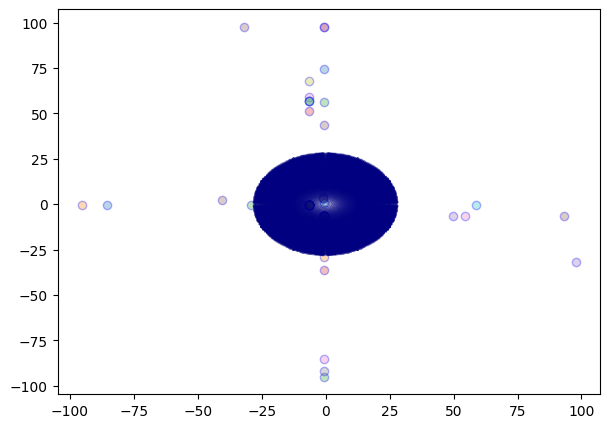

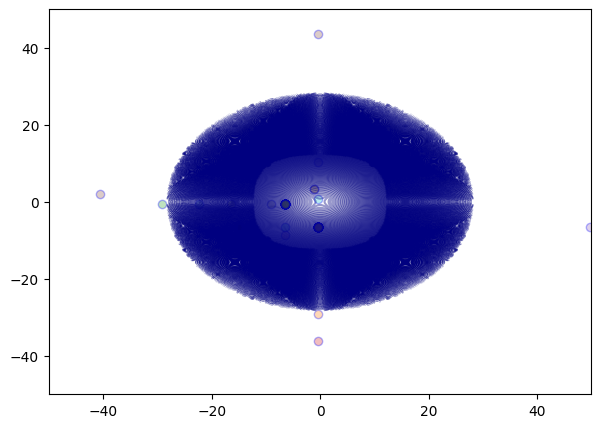

In [8]:
from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import time
from sklearn import datasets
# def my_func(x, y):
#     z = (x*x + y - 11)**2 + (x + y*y - 7)**2
#     return z

fig, ax = pl.subplots(nrows = 1, ncols = 1, figsize=(7, 5))
for t in range(len(stored_points)):    
    
    pl.clf() 
        
    # get this set of points out
    data = stored_points[t] 
    
    # plot  
    for i in range(len(data)):
        pl.scatter(data[i][0], data[i][1], edgecolor='b', alpha=0.3)  
        
    # Himmelblau
    a = np.arange(-50, 50, 0.05)
    b = np.arange(-50, 50, 0.05)
    x, y = np.meshgrid(a, b)
    z = schaffer(x, y)
    pl.contour(x, y, z, levels=np.logspace(-9, 9, 50), cmap='jet', alpha=0.4)    
    
    # animation, so pause it!
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.xlim(-50, 50)
    plt.ylim(-50, 50) 
    time.sleep(0.01)    